In [1]:
# import basic libraries 
import h5py
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

In [2]:
# Open the file
#path = "/eos/cms/store/cmst3/group/l1tr/jngadiub/L1TNtupleRun3-h5-extended-v3-120X/" # where the file is on lxplus
#path = "/eos/cms/store/cmst3/group/l1tr/jngadiub/L1TNtupleRun3-ZB-h5-extended-v3/"
#path ="https://cernbox.cern.ch/remote.php/dav/public-files/gQXk2si1mdIqQZS/"
#path = "/eos/user/j/jpearkes/SWAN_projects/forReece/"
#path = "/eos/cms/store/cmst3/group/l1tr/jngadiub/L1TNtupleRun3-h5-extended-v3-124X_maxObj_noSort_hw/"
#filename = "BSM_preprocessed.h5" 
#filename = "encoder_predictions.h5"
#filename = "ZB1_preprocessed.h5"

#path = "/eos/user/t/thaarres/L1TNtupleRun3/Run3_data/chang/"
#filename = "BSM_preprocessed.h5"

# latest MC Nov 2023
# path = "/eos/home-t/thaarres/L1TNtupleRun3/RUN_3/mc/"
# filename = "BSM_preprocessed.h5"

# latest MC Nov 2023
path = "/eos/home-t/thaarres/L1TNtupleRun3/RUN_3/data/"
filename = "L1Ntuple_2023EphZB_run367883_13_1_0_pre4_caloParams_2023_v0_2_preprocessed_sorted.h5"

f = h5py.File(path+filename, 'r')

In [3]:
# print out available information
for key in f.keys():
    if ("L1_ETM150") in key:
        print(key)
# anything with L1 is a trigger bit


L1_ETM150


In [4]:
f.keys()

<KeysViewHDF5 ['ET', 'HT', 'L1_DoubleEG8er2p5_HTT300er', 'L1_DoubleEG8er2p5_HTT320er', 'L1_DoubleEG8er2p5_HTT340er', 'L1_DoubleEG_25_12_er2p5', 'L1_DoubleEG_25_14_er2p5', 'L1_DoubleEG_27_14_er2p5', 'L1_DoubleEG_LooseIso18_LooseIso12_er1p5', 'L1_DoubleEG_LooseIso20_LooseIso12_er1p5', 'L1_DoubleEG_LooseIso22_12_er2p5', 'L1_DoubleEG_LooseIso22_LooseIso12_er1p5', 'L1_DoubleEG_LooseIso25_12_er2p5', 'L1_DoubleEG_LooseIso25_LooseIso12_er1p5', 'L1_DoubleIsoTau26er2p1_Jet70_RmOvlp_dR0p5', 'L1_DoubleIsoTau34er2p1', 'L1_DoubleIsoTau35er2p1', 'L1_DoubleIsoTau36er2p1', 'L1_DoubleJet112er2p3_dEta_Max1p6', 'L1_DoubleJet150er2p5', 'L1_DoubleJet30er2p5_Mass_Min300_dEta_Max1p5', 'L1_DoubleJet30er2p5_Mass_Min330_dEta_Max1p5', 'L1_DoubleJet30er2p5_Mass_Min360_dEta_Max1p5', 'L1_DoubleJet35_Mass_Min450_IsoTau45er2p1_RmOvlp_dR0p5', 'L1_DoubleJet40_Mass_Min450_IsoEG10er2p1_RmOvlp_dR0p2', 'L1_DoubleJet45_Mass_Min450_IsoTau45er2p1_RmOvlp_dR0p5', 'L1_DoubleJet_110_35_DoubleJet35_Mass_Min620', 'L1_DoubleJet_115_4

In [8]:
f['event_info'][0]

array([             367883,                  66,           153250693,
                       788,            17044941, 7236548967776036352],
      dtype=uint64)

In [5]:
f['full_data_cyl'][0].shape

(33, 3)

In [6]:
f['full_data_cyl'][0]

array([[ 23.,   0.,  58.],
       [ 13., -37.,  98.],
       [ 10.,  31.,  20.],
       [  9.,  21.,  74.],
       [  8., -13.,  45.],
       [  7.,  38., 143.],
       [  7., -39., 125.],
       [  6., -10.,  77.],
       [  5.,  46., 105.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [ 83., -23.,   1.],
       [ 40., -37.,  97.],
       [ 24., -21., 123.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]], dtype=float16)

In [40]:
met=f['full_data_cyl'][0][0]
jets=f['full_data_cyl'][0][1:13]
muons =f['full_data_cyl'][0][13:21]
egs = f['full_data_cyl'][0][21:]

f = f['full_data_cyl']

In [42]:
f[0]

<HDF5 dataset "full_data_cyl": shape (7322653, 33, 3), type "<f2">

In [46]:
def sorted_arr(arr):
    return np.all(arr[:-1] >= arr[1:])

# for i in range(len(f['full_data_cyl'])):
#     met=f['full_data_cyl'][i][0]
#     jets=f['full_data_cyl'][i][1:13]
#     muons =f['full_data_cyl'][i][13:21]
#     egs = f['full_data_cyl'][i][21:]
#     if not (sorted_arr(jets[:,0]) and sorted_arr(muons[:,0]) and sorted_arr(egs[:,0])):
#         print(sorted_arr(jets[:,0]))
#         print(sorted_arr(muons[:,0]))
#         print(sorted_arr(egs[:,0]))


ms_not_sorted = 0
js_not_sorted = 0
es_not_sorted = 0

for i in range(1000):
    met=f[i][0]
    jets=f[i][1:13]
    muons =f[i][13:21]
    egs = f[i][21:]
    if not (sorted_arr(jets[:,0]) and sorted_arr(muons[:,0]) and sorted_arr(egs[:,0])):
        #print("j "+str(sorted_arr(jets[:,0])))
        #print("m "+str(sorted_arr(muons[:,0])))
        #print("e "+str(sorted_arr(egs[:,0])))
        if not sorted_arr(jets[:,0]):
            js_not_sorted += 1
        if not sorted_arr(muons[:,0]):
            ms_not_sorted += 1
        if not sorted_arr(egs[:,0]):
            es_not_sorted += 1
print("ms: "+str(ms_not_sorted))
print("js: "+str(js_not_sorted))   
print("es: "+str(es_not_sorted))   
print(len(f))

ms: 13
js: 0
es: 0
7322653


In [30]:
path = "/eos/home-t/thaarres/L1TNtupleRun3/RUN_3/mc/"
filename = "BSM_preprocessed.h5"

f = h5py.File(path+filename, 'r')#["GluGluHToTauTau_M-125_PU60"]

#f.keys()
#f['event_info'][0]


In [44]:
npv_names = []
for i in f.keys():
    if 'nPV' in i:
        print(i)
        npv_names += [i]

GluGluHToGG_M-125_PU60_nPV
GluGluHToGG_M-125_PU70_nPV
GluGluHToGG_M-90_PU60_nPV
GluGluHToGG_M-90_PU70_nPV
GluGluHToGG_M-90_nPV
GluGluHToTauTau_M-125_PU60_nPV
GluGluHToTauTau_M-125_nPV
TT126X_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU60_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2-126X_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU60_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_nPV
VBFHHto4B_CV-1_C2V-1_C3-1_PU70_nPV
VBFHHto4B_CV-1_C2V-1_C3-1_nPV
VBFHHto4B_CV-1_C2V-1_C3-2_PU60_nPV
VBFHHto4B_CV-1_C2V-1_C3-2_PU70_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_PU60_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_PU70_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_nPV
VBFHToInvisible_M-125-126X_nPV
VBFHToInvisible_M-125_PU60_nPV
VBFHToTauTau_M125_PU60_nPV
VBFHToTauTau_M125_nPV
WToTauTo3Mu_nPV


In [47]:
for i in npv_names:
    print(i)
    print(f[i][:])
    #print("All same? "+str(np.all(f[i][:]==f[i][0])))

GluGluHToGG_M-125_PU60_nPV
[60. 60. 60. ... 60. 60. 60.]
GluGluHToGG_M-125_PU70_nPV
[70. 70. 70. ... 70. 70. 70.]
GluGluHToGG_M-90_PU60_nPV
[60. 60. 60. ... 60. 60. 60.]
GluGluHToGG_M-90_PU70_nPV
[70. 70. 70. ... 70. 70. 70.]
GluGluHToGG_M-90_nPV
[33. 21. 20. ... 40. 38. 49.]
GluGluHToTauTau_M-125_PU60_nPV
[60. 60. 60. ... 60. 60. 60.]
GluGluHToTauTau_M-125_nPV
[29. 36. 24. ... 43. 42. 44.]
TT126X_nPV
[44. 73. 58. ... 59. 56. 67.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU60_nPV
[60. 60. 60. ... 60. 60. 60.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU70_nPV
[70. 70. 70. ... 70. 70. 70.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_nPV
[29. 39. 39. ... 55. 45. 45.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-2-126X_nPV
[64. 54. 72. ... 47. 78. 68.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU60_nPV
[60. 60. 60. ... 60. 60. 60.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU70_nPV
[70. 70. 70. ... 70. 70. 70.]
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_PU70_nPV
[70. 70. 70. ... 70. 70. 70.]
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_nPV
[70. 70. 70. ... 70. 70. 70.]
VBFHHto4B_CV-1_C2V-1_C3

In [58]:
import mplhep as hep
plt.rcParams['figure.dpi'] = 100
hep.style.use(hep.style.CMS)

GluGluHToGG_M-125_PU60_nPV
GluGluHToGG_M-90_PU60_nPV
GluGluHToTauTau_M-125_PU60_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU60_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU60_nPV
VBFHHto4B_CV-1_C2V-1_C3-2_PU60_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_PU60_nPV
VBFHToInvisible_M-125_PU60_nPV
VBFHToTauTau_M125_PU60_nPV


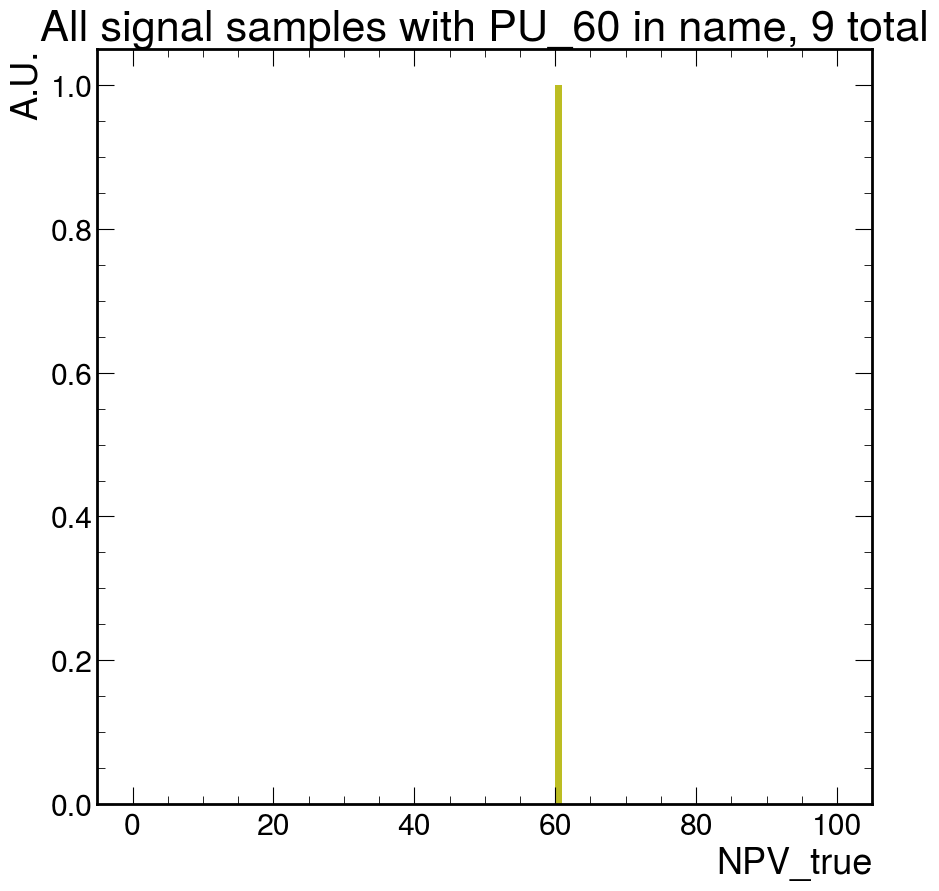

In [72]:
count = 0 
for i in npv_names:
    #print(i)
    if "PU60" in i:
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True)
        count += 1
        print(i)
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples with PU_60 in name, "+str(count)+" total")

GluGluHToGG_M-125_PU70_nPV
GluGluHToGG_M-90_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2_PU70_nPV
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_PU70_nPV
VBFHHto4B_CV-1_C2V-1_C3-1_PU70_nPV
VBFHHto4B_CV-1_C2V-1_C3-2_PU70_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_PU70_nPV


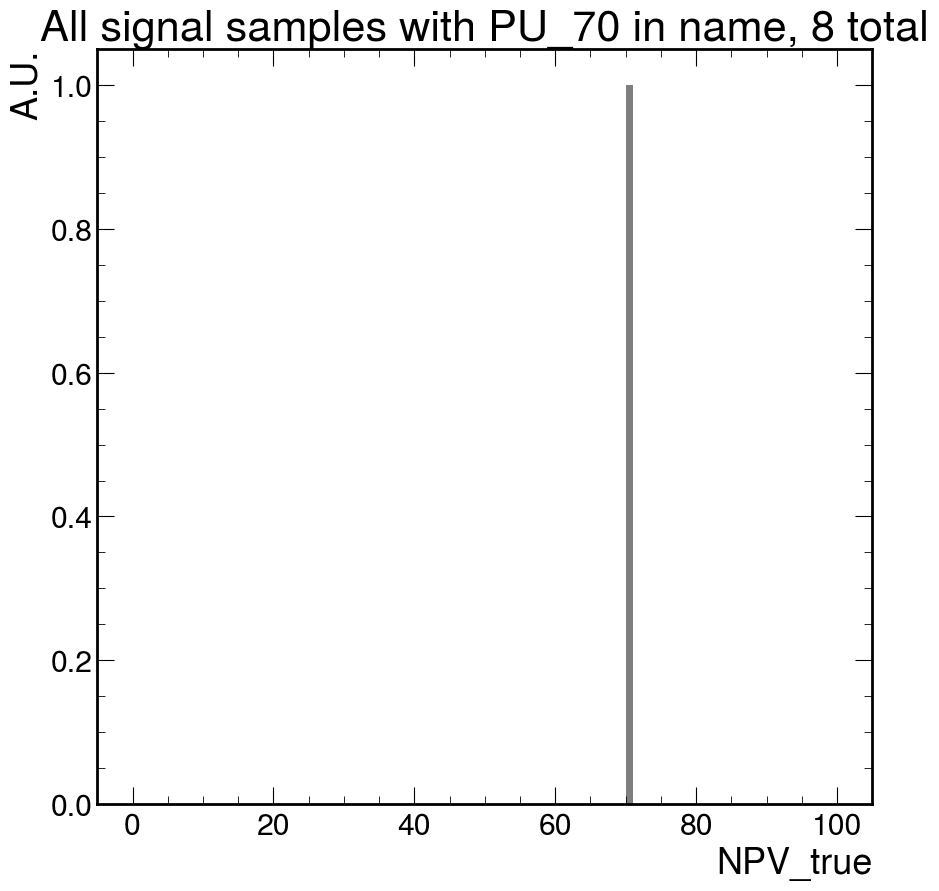

In [73]:
plt.figure()
count = 0
for i in npv_names:
    #print(i)
    if "PU70" in i:
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True)
        print(i)
        count += 1
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples with PU_70 in name, "+str(count)+" total")

GluGluHToGG_M-90_nPV
GluGluHToTauTau_M-125_nPV
TT126X_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2-126X_nPV
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_nPV
VBFHHto4B_CV-1_C2V-1_C3-1_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_nPV
VBFHToInvisible_M-125-126X_nPV
VBFHToTauTau_M125_nPV
WToTauTo3Mu_nPV


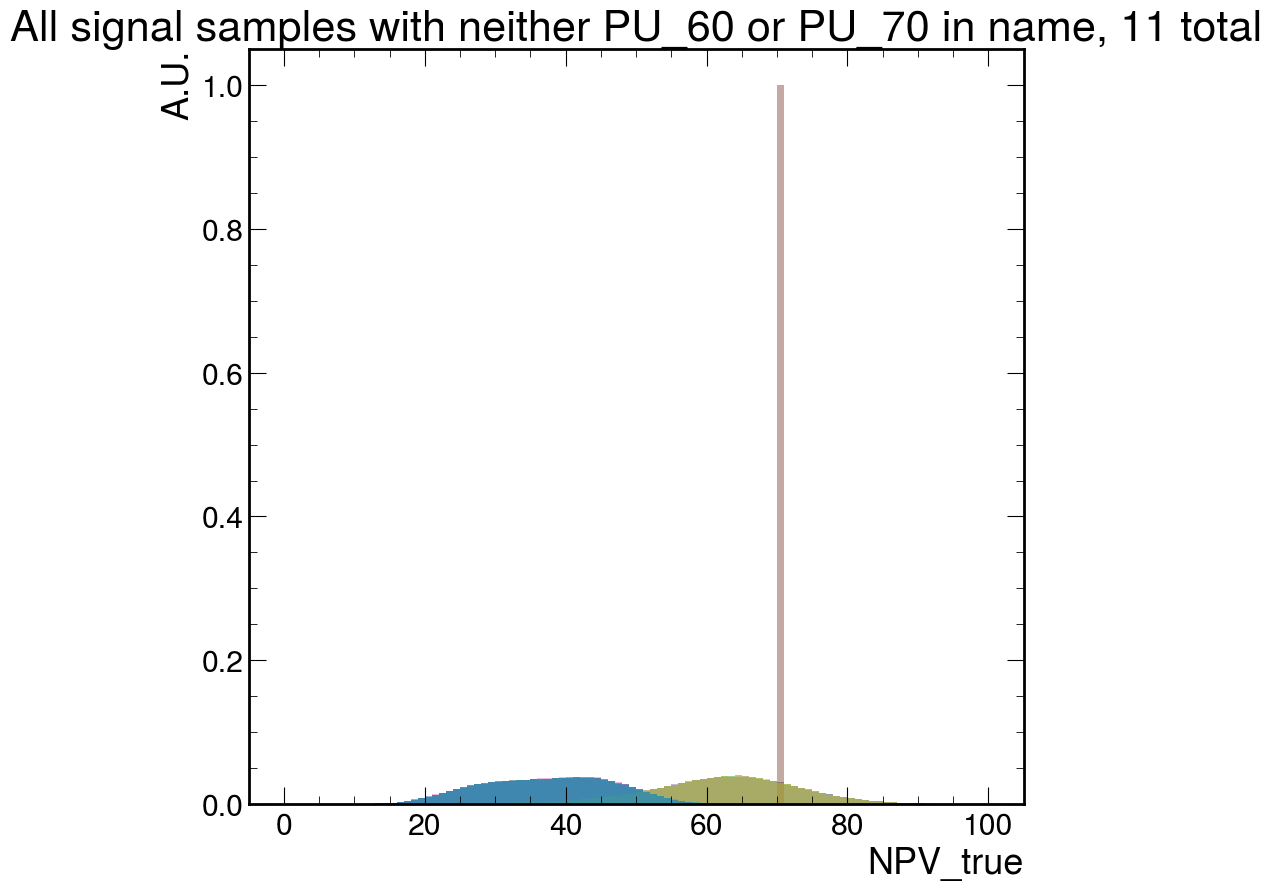

In [67]:
plt.figure()
count = 0
for i in npv_names:
    #print(i)
    if not("PU70" in i) and not("PU60" in i):
        print(i)
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True,alpha=0.5)
        count += 1
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples with neither PU_60 or PU_70 in name, "+str(count)+" total")

TT126X_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-2-126X_nPV
VBFHToInvisible_M-125-126X_nPV


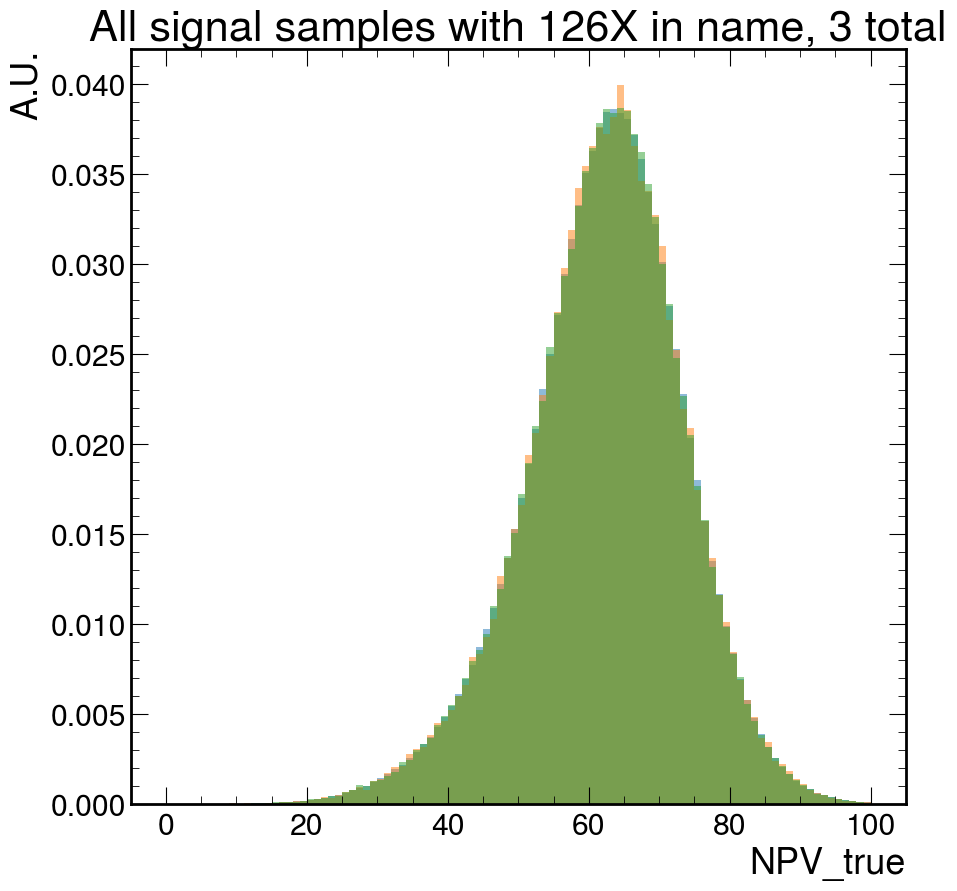

In [68]:
plt.figure()
count = 0
for i in npv_names:
    #print(i)
    if ("126X" in i):
        print(i)
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True,alpha=0.5)
        count += 1
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples with 126X in name, "+str(count)+" total")

GluGluHToGG_M-90_nPV
[33. 21. 20. ... 40. 38. 49.]
GluGluHToTauTau_M-125_nPV
[29. 36. 24. ... 43. 42. 44.]
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_nPV
[29. 39. 39. ... 55. 45. 45.]
VBFHHto2B2Tau_CV-1_C2V-2_C3-1_nPV
[70. 70. 70. ... 70. 70. 70.]
VBFHHto4B_CV-1_C2V-1_C3-1_nPV
[40. 28. 35. ... 50. 45. 48.]
VBFHHto4B_CV-1_C2V-2_C3-1_nPV
[43. 25. 33. ... 22. 56. 26.]
VBFHToTauTau_M125_nPV
[46. 33. 55. ... 50. 19. 46.]
WToTauTo3Mu_nPV
[39. 42. 24. ... 44. 44. 41.]


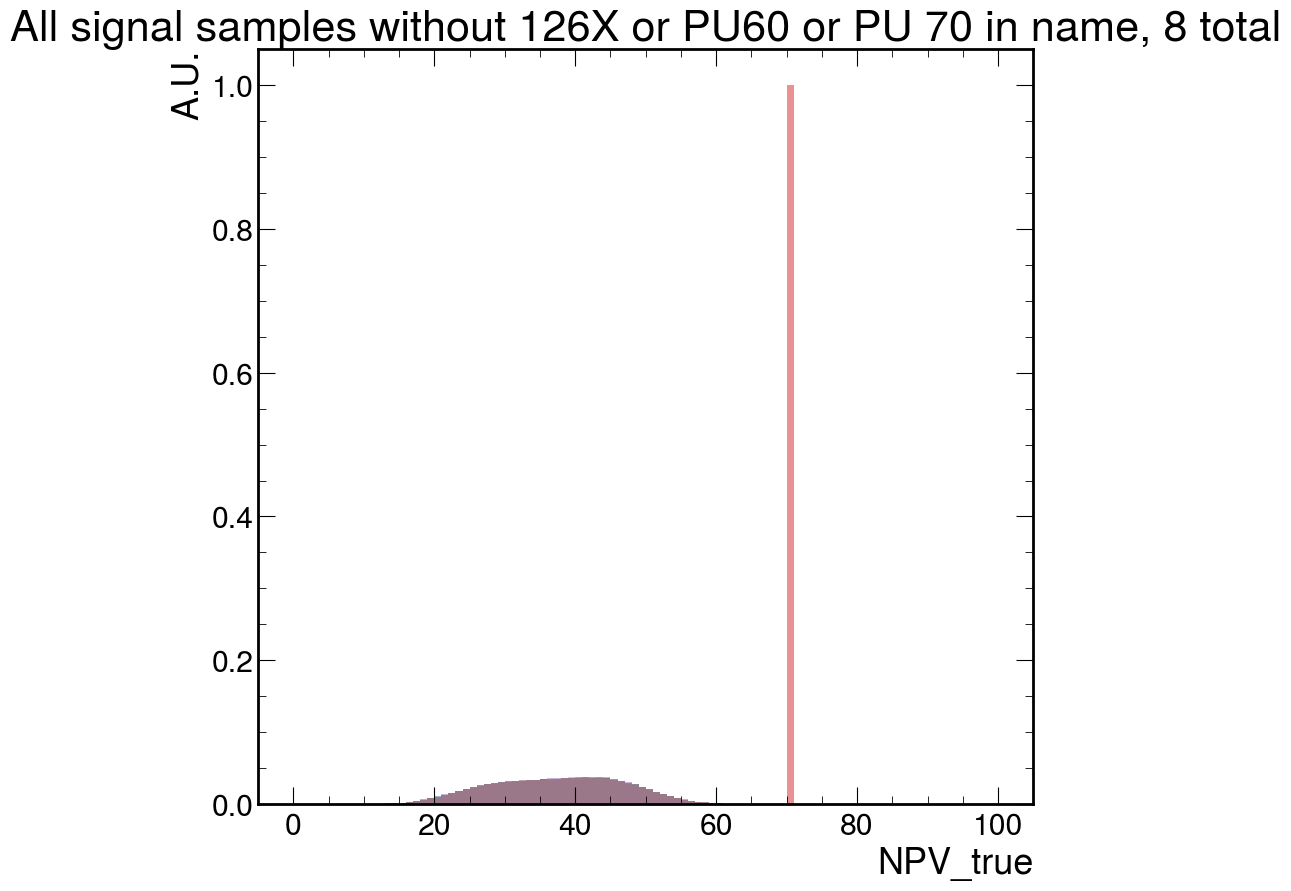

In [71]:
plt.figure()
count = 0
for i in npv_names:
    #print(i)
    if not ("126X" in i) and not("PU70" in i) and not("PU60" in i):
        print(i)
        print(f[i][:])
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True,alpha=0.5)
        count += 1
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples without 126X or PU60 or PU 70 in name, "+str(count)+" total")

GluGluHToGG_M-90_nPV
GluGluHToTauTau_M-125_nPV
VBFHHto2B2Tau_CV-1_C2V-1_C3-1_nPV
VBFHHto4B_CV-1_C2V-1_C3-1_nPV
VBFHHto4B_CV-1_C2V-2_C3-1_nPV
VBFHToTauTau_M125_nPV
WToTauTo3Mu_nPV


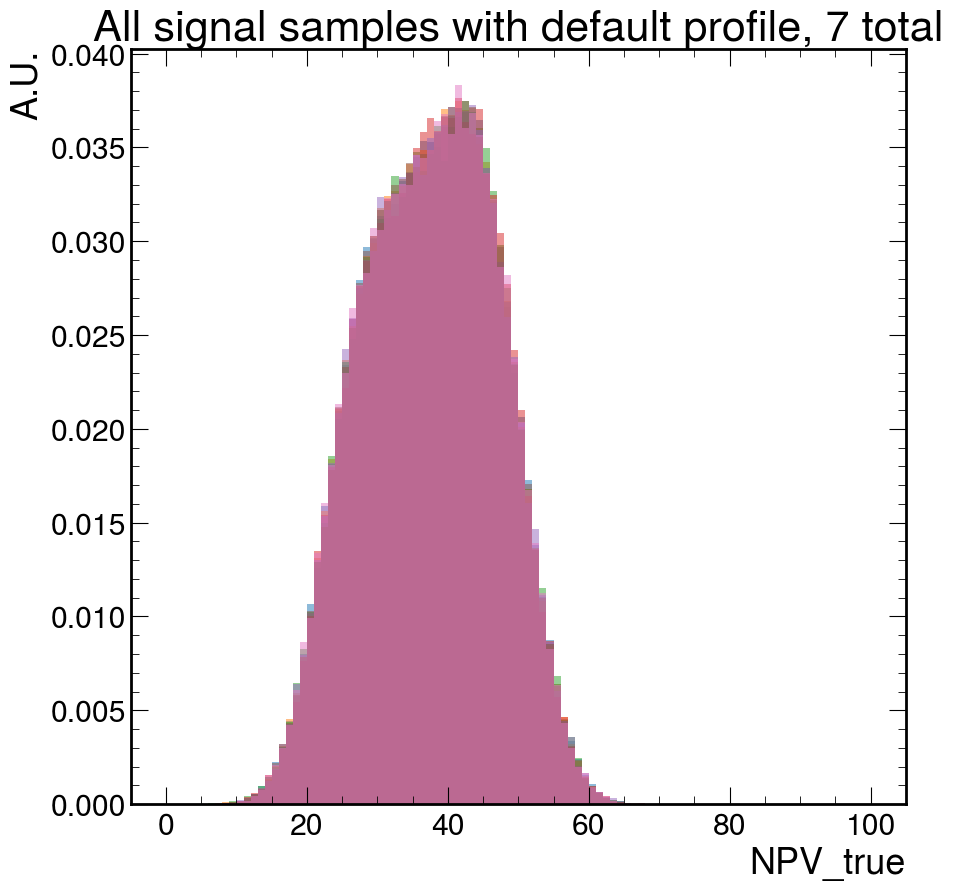

In [79]:
plt.figure()
count = 0
for i in npv_names:
    #print(i)
    if not ("126X" in i) and not("PU70" in i) and not("PU60" in i) and not ("VBFHHto2B2Tau_CV-1_C2V-2_C3-1_nPV" in i):
        print(i)
        #print(f[i][:])
        plt.hist(f[i][:],label=i,bins=100,range=(0,100),density=True,alpha=0.5)
        count += 1
    plt.xlabel("NPV_true")
    plt.ylabel("A.U.")
    plt.title("All signal samples with default profile, "+str(count)+" total")

In [ ]:
path = "/eos/home-t/thaarres/L1TNtupleRun3/RUN_3/mc/"
filename = "BSM_preprocessed.h5"

In [42]:
np.any(f['GluGluHToGG_M-125_PU60_nPV'][:]!=60)

False

In [24]:
ms_not_sorted = 0
js_not_sorted = 0
es_not_sorted = 0

for i in range(len(f)):
    met=f[i][0]
    jets=f[i][1:13]
    muons =f[i][13:21]
    egs = f[i][21:]
    if not (sorted_arr(jets[:,0]) and sorted_arr(muons[:,0]) and sorted_arr(egs[:,0])):
        #print("j "+str(sorted_arr(jets[:,0])))
        #print("m "+str(sorted_arr(muons[:,0])))
        #print("e "+str(sorted_arr(egs[:,0])))
        if not sorted_arr(jets[:,0]):
            js_not_sorted += 1
        if not sorted_arr(muons[:,0]):
            ms_not_sorted += 1
        if not sorted_arr(egs[:,0]):
            es_not_sorted += 1
print("ms: "+str(ms_not_sorted))
print("js: "+str(js_not_sorted))   
print("es: "+str(es_not_sorted))   
print(len(f))

ms: 2467
js: 0
es: 0
264000


In [36]:
jets[:,0][1:]

array([10.,  9.,  8.,  7.,  7.,  6.,  5.,  0.,  0.,  0.,  0.],
      dtype=float16)

In [7]:
f["HTo2LongLivedTo4b_MH1000_MFF450_CTau10m"].

TypeError: fields() missing 1 required positional argument: 'names'

In [4]:
f["mu"]

<HDF5 group "/mu" (53 members)>

In [5]:
for key in f["mu"].keys():
    print(key)

EMJ_mMed_100_mDark_10_ctau_10
EMJ_mMed_250_mDark_10_ctau_10
EMJ_mMed_500_mDark_10_ctau_10
EMJ_mMed_500_mDark_10_ctau_1000
EMJ_mMed_500_mDark_10_ctau_2000
EMJ_mMed_500_mDark_10_ctau_500
EMJ_mMed_500_mDark_200_ctau_10
GluGluHToTauTau_M125
GluGluToHHTo4B_cHHH1
GluGluToHHTo4B_cHHH5
HTo2LongLivedTo4b_MH1000_MFF450_CTau100m
HTo2LongLivedTo4b_MH1000_MFF450_CTau10m
HTo2LongLivedTo4b_MH125_MFF12_CTau0p9m
HTo2LongLivedTo4b_MH125_MFF12_CTau9m
HTo2LongLivedTo4b_MH125_MFF25_CTau15m
HTo2LongLivedTo4b_MH125_MFF25_CTau1p5m
HTo2LongLivedTo4b_MH125_MFF50_CTau30m
HTo2LongLivedTo4b_MH125_MFF50_CTau3m
HTo2LongLivedTo4b_MH250_MFF120_CTau10m
HTo2LongLivedTo4b_MH250_MFF120_CTau1m
HTo2LongLivedTo4b_MH250_MFF60_CTau1m
HTo2LongLivedTo4b_MH350_MFF160_CTau0p5m
HTo2LongLivedTo4b_MH350_MFF160_CTau10m
HTo2LongLivedTo4b_MH350_MFF160_CTau1m
HTo2LongLivedTo4b_MH350_MFF80_CTau0p5m
HTo2LongLivedTo4b_MH350_MFF80_CTau10m
HTo2LongLivedTo4b_MH350_MFF80_CTau1m
HTo2LongLivedTo4mu_MH1000_MFF450_CTau10m
HTo2LongLivedTo4mu_MH125_M

In [18]:
f["HTo2LongLivedTo4mu_MH125_MFF12_CTau0p9m"].shape

(37639, 19, 3)

In [16]:
f["mu2"]["TT"][:]

array([ 39.328125, 631.6875  ,  96.8125  , ..., 452.23438 , 245.51562 ,
        38.3125  ], dtype=float32)

In [10]:
# look at the format of some branches
f["L1bit"]
# (there are 976,000 collisions stored in this dataset)

<HDF5 dataset "L1bit": shape (13000886,), type "|b1">

In [11]:
f["L1bit"][:] # the L1bit decides whether an event is kept or deleted
# here you can see that most entries are False, meaning that the L1 trigger decision usually doesn't accept these events

array([False, False, False, ..., False, False, False])

In [12]:
# check to see if any events are accepted 
np.sum(f["L1bit"][:])
# yup, 1831 events are 

26234

In [13]:
# this is where our training data lives! Let's save it with a new name
dataset = f['full_data_cyl']

In [14]:
# we can look at the shape
dataset.shape
# you will see:
# 976000 rows these correspond to 976000 collisions
# 19 columns - these correspond to different physics objects (jets, MET, electrons etc.)
# 3 columns (pt, eta, phi) for each object

(13000886, 19, 3)

In [15]:
# what do the 19 columns correspond to? 

# [met_cyl, e_cyl, m_cyl, j_cyl]
# met_cyl - missing transverse energy
# e_cyl - electrons
# m_cyl - muons 
# j_cyl - jets 
# reference https://gitlab.cern.ch/cms-l1-ad/l1tntuple-maker/-/blob/120X/preprocess.py#L92

# how many of each object are stored? 
# met = 1
# electrons = 4
# muons = 4
# jets = 10 
# reference: https://gitlab.cern.ch/cms-l1-ad/l1_anomaly_ae/-/blob/master/dnn/config-PU70.yml#L44

# TODO: figure out which indices correspond to which objects, e.g.
# there are ten jets and they are the last set of variables 
# so they will go from indices 10 to 19
# dataset[:,10,0] would be the pt of the first jet 
# dataset[:,11,0] would be the pt of the second jet 

# the objects will typically be pt ordered, meaning electron 0 will have a higher pt than electron 1,
# and jet 0 will have a higher pt than jet 1

In [16]:
# to access the pt of the first jet for all collisions we'll slice like this
pt_0 = dataset[:,10,0]

Text(0, 0.5, 'Events')

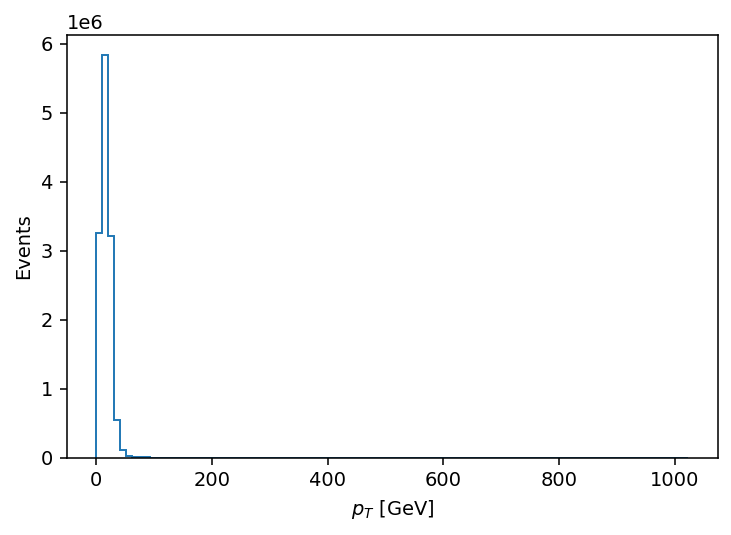

In [17]:
# let's plot it!
plt.hist(pt_0,bins=100,histtype='step')
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Events")

# you'll notice a spike at zero on this plot, this is because not all collisions create a jet!
# TODO try changing the number of bins 
# TODO try changing the range on the xaxis
# TODO try making this on a log plot


Text(0, 0.5, 'Events')

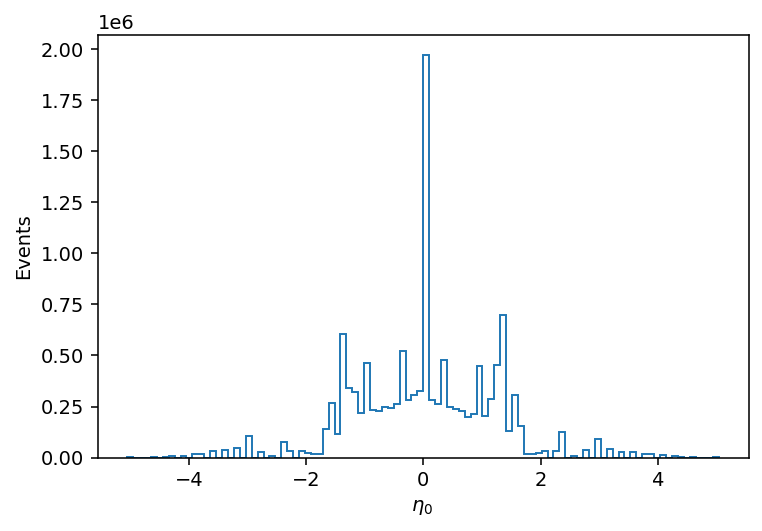

In [18]:
# let's try plotting the eta of the first jet
plt.hist(dataset[:,10,1],bins=100,histtype='step')
plt.xlabel(r"$\eta_0$ ")
plt.ylabel("Events")


Text(0, 0.5, 'Events')

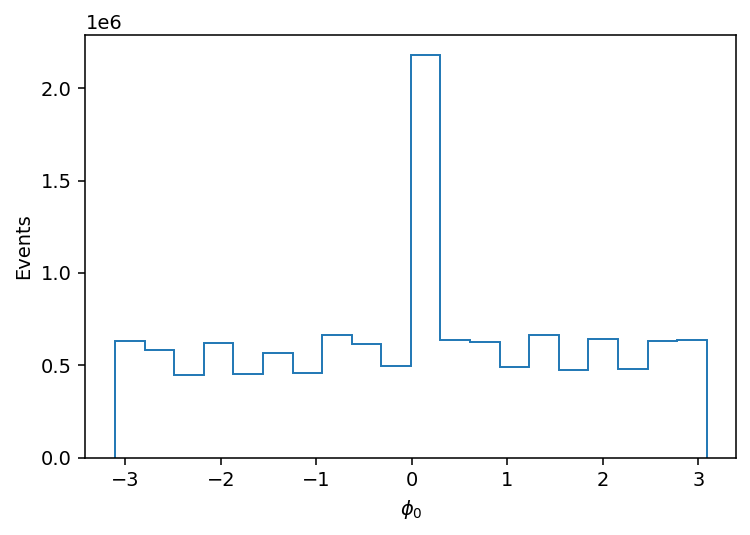

In [19]:
plt.hist(dataset[:,10, 2],bins=20,histtype='step')
plt.xlabel(r"$\phi_0$")
plt.ylabel("Events")

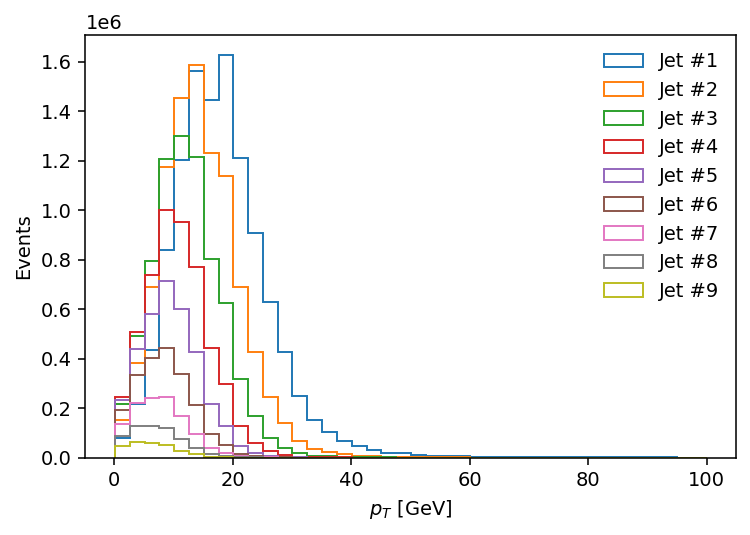

In [22]:
# try plotting the first three jets on the same plot
jet_count = 0
for i in np.arange(10,19):
    jet_count += 1
    plt.hist(dataset[:,i, 0],bins=40,range=(0.1,100), # here I changed the range to skip the 0
             histtype='step',label="Jet #"+str(jet_count)) 
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)

# TODO: Repeat for eta and phi with jets 
# TODO: Repeat plots of pt, eta and phi for MET, electrons and muons 
# TODO: Do you see any trends? 


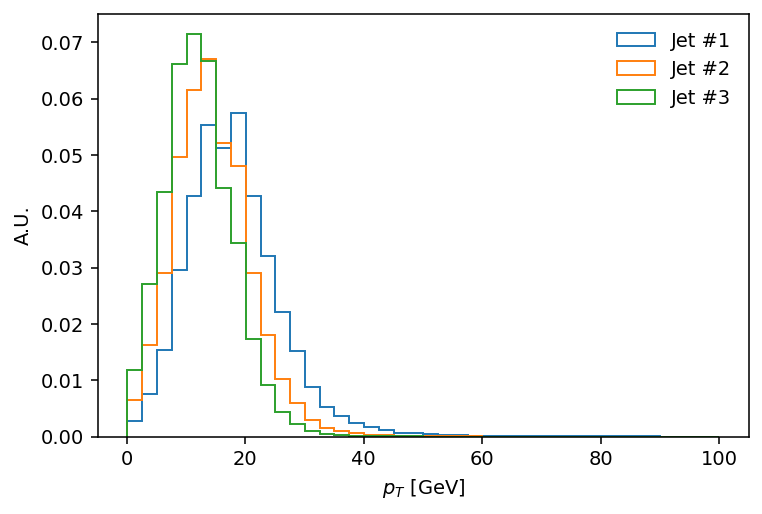

In [21]:
# Note, you can also turn this into a density plot with density=True 
# this will normalize each histogram. 
# Make sure to set the yaxis label to Arbitrary Units (A.U.) if you do this
jet_count = 0
for i in np.arange(10,13):
    jet_count += 1
    plt.hist(dataset[:,i, 0],bins=40,range=(0.1,100), 
             histtype='step',label="Jet #"+str(jet_count),density=True) 
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("A.U.")
plt.legend(frameon=False)

In [5]:
g = h5py.File("encoder_predictions.h5", 'r')

OSError: Unable to open file (bad object header version number)

In [11]:
import uproot

In [16]:
path = "/eos/cms/store/cmst3/group/l1tr/jngadiub/L1TNtupleRun3-120X/GluGluToHHTo4B_node_cHHH1_TuneCP5_14TeV-powheg-pythia8/mcRun3_Run3Summer21DRPremix-120X_v6-v2/211224_001418/0000/"
filename = "L1Ntuple_10.root"

#path = "/eos/cms/store/cmst3/group/l1tr/jngadiub/EZB_12_108p1/EphemeralZeroBias1/zbD1/211125_191622/0000/"
#filename = "L1Ntuple_8.root"

In [17]:
file = uproot.open(path+filename)

In [18]:
file.keys()

['l1EventTree;1',
 'l1EventTree/L1EventTree;1',
 'l1CaloTowerTree;1',
 'l1CaloTowerTree/L1CaloTowerTree;1',
 'l1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonTree/L1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTfMuonShowerTree/L1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTree;1',
 'l1UpgradeTree/L1UpgradeTree;1',
 'l1uGTTree;1',
 'l1uGTTree/L1uGTTree;1',
 'l1HOTree;1',
 'l1HOTree/L1HOTree;1',
 'l1UpgradeTfMuonEmuTree;1',
 'l1UpgradeTfMuonEmuTree/L1UpgradeTfMuonTree;1',
 'l1CaloTowerEmuTree;1',
 'l1CaloTowerEmuTree/L1CaloTowerTree;1',
 'l1UpgradeEmuTree;1',
 'l1UpgradeEmuTree/L1UpgradeTree;1',
 'l1uGTEmuTree;1',
 'l1uGTEmuTree/L1uGTTree;1',
 'l1GeneratorTree;1',
 'l1GeneratorTree/L1GenTree;1']

In [24]:
file["l1uGTTree/L1uGTTree"].keys()

['L1uGT',
 'L1uGT/m_orbitNr',
 'L1uGT/m_bxNr',
 'L1uGT/m_bxInEvent',
 'L1uGT/m_finalOR',
 'L1uGT/m_finalORPreVeto',
 'L1uGT/m_finalORVeto',
 'L1uGT/m_preScColumn',
 'L1uGT/m_algoDecisionInitial',
 'L1uGT/m_algoDecisionPreScaled',
 'L1uGT/m_algoDecisionFinal']

In [19]:
file["l1EventTree/L1EventTree"].keys()

['Event',
 'Event/run',
 'Event/event',
 'Event/lumi',
 'Event/bx',
 'Event/orbit',
 'Event/time',
 'Event/nPV',
 'Event/nPV_True',
 'Event/hlt',
 'Event/puWeight']

In [21]:
file["l1EventTree/L1EventTree/Event/nPV"].array()

<Array [46, 60, 21, 28, 28, ... 19, 53, 55, 39] type='1540 * int32'>

In [22]:
file["l1EventTree/L1EventTree/Event/nPV_True"].array()

<Array [33, 48, 32, 30, 26, ... 17, 55, 45, 29] type='1540 * int32'>

In [50]:
file["l1EventTree/L1EventTree"]["Event/bx"].array()

<Array [4294967295, 4294967295, ... 4294967295] type='1540 * uint32'>

In [23]:
file["l1uGTTree/L1uGTTree"].keys()

['L1uGT',
 'L1uGT/m_orbitNr',
 'L1uGT/m_bxNr',
 'L1uGT/m_bxInEvent',
 'L1uGT/m_finalOR',
 'L1uGT/m_finalORPreVeto',
 'L1uGT/m_finalORVeto',
 'L1uGT/m_preScColumn',
 'L1uGT/m_algoDecisionInitial',
 'L1uGT/m_algoDecisionPreScaled',
 'L1uGT/m_algoDecisionFinal']

In [26]:
file["l1uGTTree/L1uGTTree"]['L1uGT/m_bxNr'].array()

<Array [-1843844233, ... -1843844233] type='1540 * int32'>

In [51]:
file["l1uGTTree/L1uGTTree"]["L1uGT/m_bxInEvent"].array()

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='1540 * int32'>

In [30]:
np.sum(file["l1uGTTree/L1uGTTree"]["L1uGT/m_bxInEvent"].array())

0